# Get Data from Hive

First we load the two tables 'training.weather' and 'training.stations' from Hive using the spark.read.table method. This will create DataFrames encapsulating the Hive tables.

In [19]:
# Get table 'training.weather' from Hive and store it in the variable weather
weather = spark.read.table('training.weather')
# Get table 'training.stations' from Hive and store it in the variable stations
stations = spark.read.table('training.stations')

# Process Data

Now we want to perform a simple analysis on the data: Calculate minimum and maximum wind speed and air temperature per country and year. This needs to be performed in three steps:

1. Join weather data and stations on the columns 'usaf' and 'wban'
2. Group the data by the relevant columns year and country
3. Perform min/max aggregations. Also pay attentions to the fields `air_temperature_qual` and `wind_speed_qual`, where "1" means valid value

In [20]:
from pyspark.sql.functions import *

df = weather.join(stations, (weather.usaf == stations.usaf) & (weather.wban == stations.wban))
result = df.groupBy(df.country, df.year).agg(
        min(when(df.air_temperature_qual == lit(1), df.air_temperature)).alias('min_temp'),
        max(when(df.air_temperature_qual == lit(1), df.air_temperature)).alias('max_temp'),
        min(when(df.wind_speed_qual == lit(1), df.wind_speed)).alias('min_wind'),
        max(when(df.wind_speed_qual == lit(1), df.wind_speed)).alias('max_wind')
    )

pdf = result.toPandas()    
pdf

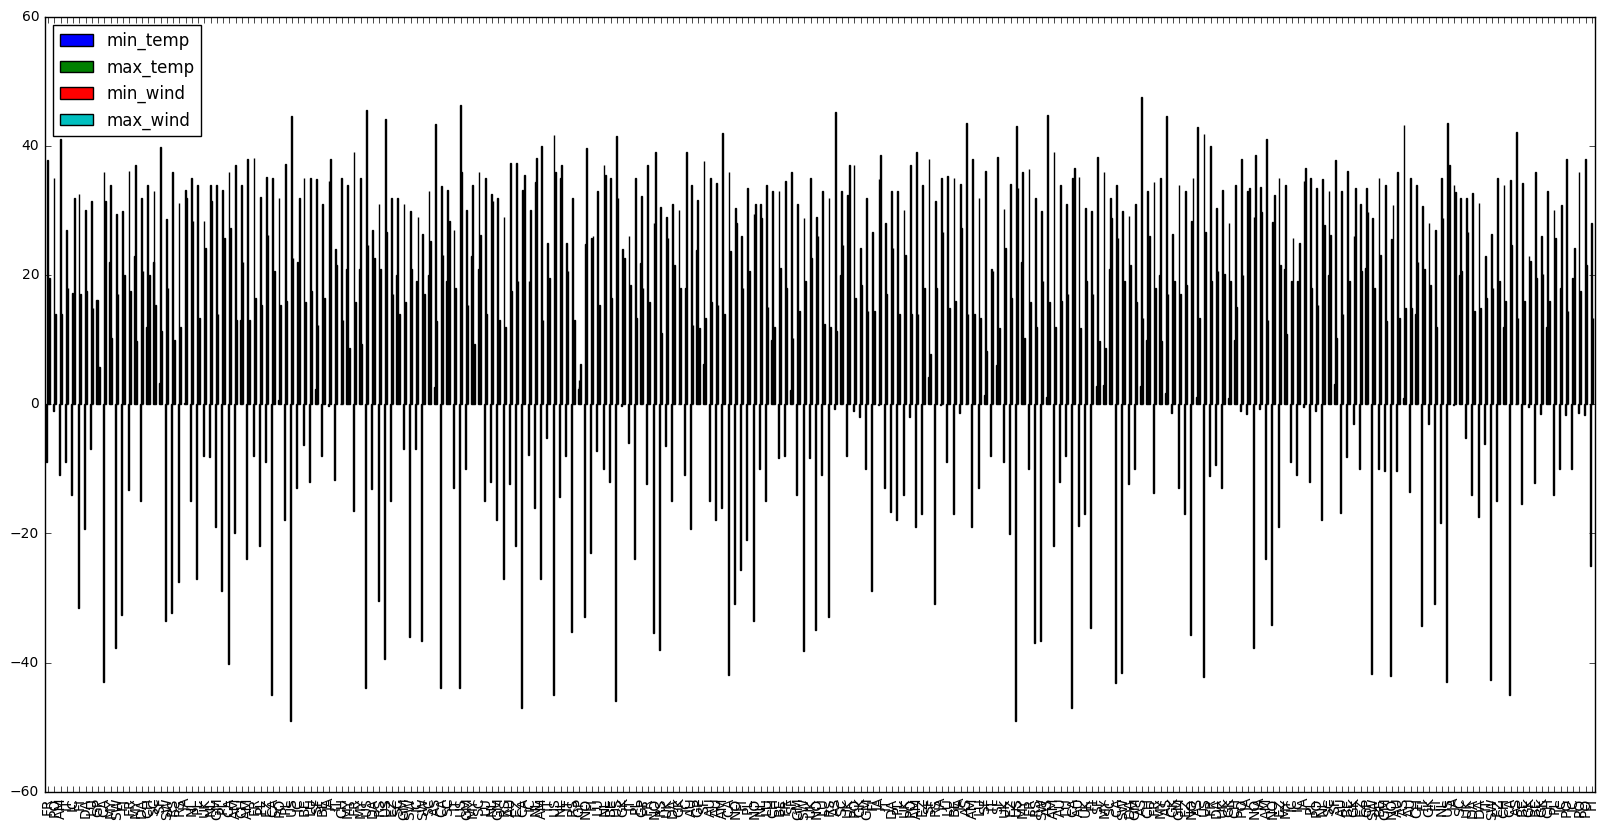

In [22]:
%matplotlib inline
p = pdf.plot(kind='bar',figsize=(20,10), xticks=pdf.index)
p.set_xticklabels(pdf['country'])